# Import Data

In [212]:
###### import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn import svm, metrics

# df = pd.read_csv("/Users/elleemortensen/Documents/GitHub/BP24/Ellee/Data/Stacked/stacked_orig.csv", header=None)
df2 = pd.read_excel('/Users/elleemortensen/Downloads/D3Softball.xlsx', index_col=[0])
# df.replace('---', np.nan, inplace=True)
# df.dropna(inplace=True)
# df.shape

# # Creating NumPy array
# array = np.array(data)

# # Converting to Pandas DataFrame
# df = pd.DataFrame(array)

# Convert 25/150 Columns into NON-CONSECUTIVE Categorical Variables

In [ ]:
# for i in range(-5,0):
#     df.iloc[:,i] = df.iloc[:,i].astype(int) # Integer
#     df.iloc[:,i] = df.iloc[:,i].astype('category') # Categories
# df.dtypes

# Train Test Split

In [ ]:
# from sklearn.model_selection import train_test_split
# # Split dataset into X_train and y_train
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, :-1], df2.iloc[:, -1], test_size=0.3, random_state=42)
X_train.shape

# X_train = df.iloc[:168,:-1]
# X_test = df.iloc[168:,:-1]
# y_train = df.iloc[:168,-1]
# y_test = df.iloc[168:,-1]

In [ ]:
random_columns = [16,17,18,19,20,21,22,23]

# Create a copy of the saved_X_train variable
cat_X_train = X_train.copy()

# Process the randomly selected columns into categorical
for col in random_columns:
    cat_X_train[col] = X_train[col].round().astype(int)

# Visualization

In [ ]:
scatter = plt.scatter(X_train.iloc[:,6], X_train.iloc[:,7], c=y_train)

# SMOTE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df = pd.read_csv("C:/Users/aceme/OneDrive/Documents/GitHub/BP24/IRIS.csv")
df.head()

In [ ]:
# Data exploration
x=df.drop(['species'],axis=1)[1:70] # 150 rows -> 70 rows to match with created imbalance
y=df['species'][1:70] # creating imbalance
count_class=df['species'][1:70].value_counts()
bar_colors = ['tab:blue', 'tab:red']
plt.bar(count_class.index, count_class.values, color=bar_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Iris-setosa', 'Iris-versicolor'])
plt.show()
y.value_counts()

In [ ]:
# SMOTE to balance species classes
smote=SMOTE(sampling_strategy='minority')  # generating synthetic samples for minority class
x,y=smote.fit_resample(x,y) # re-sampling
y.value_counts() # Looking at counts post-SMOTE algoirthm

count_class=y.value_counts()
bar_colors = ['tab:blue', 'tab:red']
plt.bar(count_class.index, count_class.values, color=bar_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Iris-setosa', 'Iris-versicolor'])
plt.show()
y.value_counts()

# Edited function

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 23 13:45:56 2024

@author: cdiet
"""

import pandas as pd
import numpy as np
import random
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.svm import SVC


def betterApplyAugmentationMethods(X_train, method, nrows, nvalues=None, unit=None, noise=None):
    # If nvalues not specified, entire column is selected
    if nvalues is None:
        nvalues = X_train.shape[1] - 1

    if str(method).lower() == 'pmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                if (random.randint(0, 1) == 0):
                    augmentedDf.iloc[i, col] += unit
                else:
                    augmentedDf.iloc[i, col] -= unit

        return augmentedDf

    elif str(method).lower() == 'modpmone':
        # Creates empty dataframe to store augmented data
        augmentedDf = pd.DataFrame()

        # Randomly selects rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects nvalues amount of unique column indexes
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Iterates through augmentedData and applies plus or minus to randCols indexes
        for i in range(augmentedDf.shape[0]):
            for col in randCols:
                colMax = X_train.iloc[:, col].max()
                colMin = X_train.iloc[:, col].min()

                if (augmentedDf.iloc[i, col] + unit < colMax and augmentedDf.iloc[i, col] - unit > colMin):
                    if (random.randint(0, 1) == 0):
                        if (augmentedDf.iloc[i, col] + unit <= colMax):
                            augmentedDf.iloc[i, col] += unit
                        else:
                            augmentedDf.iloc[i, col] -= unit
                    else:
                        if (augmentedDf.iloc[i, col] - unit >= colMin):
                            augmentedDf.iloc[i, col] -= unit
                        else:
                            augmentedDf.iloc[i, col] += unit

        return augmentedDf

    elif str(method).lower() == 'gausnoise':
        # Creates empty dataframe to hold augmented rows
        augmentedDf = pd.DataFrame()

        # Selects random rows from data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Selects random unique column index
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Applies Gaussian noise to randCols values stored in array
        for i in range(augmentedDf.shape[0]):
            for cols in randCols:
                augmentedDf.iloc[i, cols] += np.random.normal(0, noise)

        return augmentedDf

    elif str(method).lower() == 'modgausnoise':
        # Creates an empty dataframe to hold augmented observations
        augmentedDf = pd.DataFrame()

        # Randomly selects unique column indexs from data
        randCols = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Appends randomly selected rows from data to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Generates Gaussian distribution based on columns summary statistics
        # Swaps value with random value in generated Gaussian distribution
        for col in randCols:
            for i in range(augmentedDf.shape[0]):
                mean = augmentedDf[col].mean()
                stDev = augmentedDf[col].std()

                augmentedDf.iloc[i, col] = np.random.normal(mean, stDev)

        return augmentedDf

    elif str(method).lower() == 'randswap':
        # Creates empty dataframe to store augmented rows
        augmentedDf = pd.DataFrame()

        # Copies nrows from original data and appends to augmentedDf
        for i in range(nrows):
            augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                    ignore_index=True)

        # Picks UNIQUE column indexes to swap
        columnIndexSwaps = random.sample(range(0, X_train.shape[1] - 1), nvalues)

        # Swaps augmentedDf column value from same column in data
        for i in range(augmentedDf.shape[0]):
            for col in columnIndexSwaps:
                randValue = X_train.iloc[random.randint(0, X_train.shape[0] - 1), col]

                augmentedDf.iloc[i, col] = randValue

        return augmentedDf

    else:
        print("Method not found")
        return None


def generateLabels(X_train, y_train, augmented):
    # import the class
    from sklearn.linear_model import LogisticRegression

    # instantiate the model (using the default parameters)
    # random.seed(1)
    logreg = LogisticRegression(max_iter=10000)

    # fit the model with data

    # print(y_train)
    logreg.fit(X_train, y_train)

    # create the prediction
    augmented_labels = pd.DataFrame(logreg.predict(augmented))

    Y_train = pd.concat([y_train, augmented_labels], axis=0, ignore_index=True)

    X_train = pd.concat([X_train, augmented], axis=0, ignore_index=True)

    return X_train, y_train


def runClassifier(X_train, y_train, X_test, y_test, classifier):
    # Creates accuracy table dataframe
    results_df = pd.DataFrame(columns=["Accuracy", "Mean Absolute Error", "Rooted Mean Square Error", "F1 Score"])

    if classifier == "kNN":

        knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

        knn.fit(X_train, Y_train.values.ravel())

        # Predict on dataset which model has not seen before
        predicted_values = knn.predict(X_test)

    elif classifier == "D_tree":
        clf_gini = DecisionTreeClassifier(criterion="gini",
                                          random_state=100, max_depth=3, min_samples_leaf=5)

        clf_gini.fit(X_train, Y_train)

        predicted_values = clf_gini.predict(X_test)


    elif classifier == "Naive_bayes":

        classifier = GaussianNB()
        classifier.fit(X_train, Y_train)

        predicted_values = classifier.predict(X_test)

    elif classifier == "ANN":
        # Performing Feature Scaling
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        # Initializing Artificial Neural Network
        ann = tf.keras.models.Sequential()

        # Adding Hidden Layers
        ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
        ann.add(tf.keras.layers.Dense(units=6, activation="relu"))

        # Adding output layers
        ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

        # compiling the Artificial Neural Network
        ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

        # Fitting the Artificial Neural Network
        ann.fit(X_train, Y_train, batch_size=32, epochs=100)

        # Generate the predicted labels
        first_predicted_values = ann.predict(X_test)
        second_predicted_labels = first_predicted_values > .5
        final_predicted_labels = second_predicted_labels * 1
        predicted_values = final_predicted_labels

    # SVM
    elif classifier == "SVM":
        # random.seed(1)
        svm = SVC(gamma=2, C=1, kernel='linear', max_iter=1000000, random_state=0)

        # fit the model with data
        # svm.fit(X_train,y_train)
        svm.fit(X_train, Y_train)
        predicted_values = svm.predict(X_test)

        # SVM
    elif classifier == "xgboost":
        # Create model instance
        bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic', enable_categorical=True)
        
        # fit model with the training data
        bst.fit(X_train, y_train)
        
        # make predictions for the test dataset
        predicted_values = bst.predict(X_test)

    else:
        print("Unknown classifier")
        return None

    # Accuracy
    acc = skm.accuracy_score(y_test, predicted_values)
    mae_accuracy = skm.mean_absolute_error(y_test, predicted_values)
    #rmse_accuracy = skm.root_mean_squared_error(y_test, predicted_values)
    f1_accuracy = skm.f1_score(y_test, predicted_values)

    # Appends accuracies to accuracy table
    results_df.loc[1, 'Accuracy'] = acc
    results_df.loc[1, 'Mean Absolute Error'] = mae_accuracy
    #results_df.loc[1, 'Rooted Mean Square Error'] = rmse_accuracy
    results_df.loc[1, 'F1 Score'] = f1_accuracy

    return results_df


"""
generatedGaussianDistrubutions Inputs

nrows: Number of rows
ncolumns: Number of columns
median1: First Gaussian distribution median (center)
median2: Second Gaussian distribution median (center)
spread1: First Gaussian distrbiution spread
spread2: Second Gaussian distribution spread

Note:
if label == 0, first Gaussian distribution
if label == 1, second Gaussian distribution
"""


def generateGaussianDistributions(nrows, ncolumns, median1, median2, spread1, spread2):
    # Creates first Gaussian distribution
    label1 = pd.DataFrame(np.random.normal(median1, spread1, size=(int(nrows / 2), ncolumns)))
    # Adds new column for label
    label1['label'] = 0

    # Creates second Gaussian distribution
    label2 = pd.DataFrame(np.random.normal(median2, spread2, size=(int(nrows / 2), ncolumns)))
    # Adds new column for label
    label2['label'] = 1

    # Combines both Gaussian distributions
    df = pd.concat([label1, label2])

    # Shuffles Gaussian distributions
    shuffled_df = pd.DataFrame(np.random.permutation(df))

    return shuffled_df


"""
superFunction applies all methods from the flowchart: augmentation, 
interpretable/uninterpretable classifiers, and accuracy, taking all inputs from
these functions and outputs the accuracy of the augmented data.

Inputs:
    data: A dataframe where the labels are the LAST column
    method: The augmentation method the user wants to use for the data
    nrows: How many output augmentation rows are wanted
    nvalues: The number of values in each row that need to be augmented
    classifier: The classifier the user wants to use
    unit(optional): Only for the pmOne augmentation method and is the unit the 
    augmented data will differ from original data by
    noise(optional): Only for the gausNoise augmentation method and denotes the
    percent by which the augmented data varies from original data


Outputs:
    Returns two dataframes of original and augmented data accuracy measures
"""


def superFunction(data, method, nrows, nvalues, classifier, unit=None, noise=None):
    X = data.drop(data.shape[1] - 1, axis=1)
    Y = data[data.shape[1] - 1]

    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42)

    original_accuracies = runClassifier(X_train, y_train, X_test, y_test, classifier)

    # Applies augmentation method to X_train
    augmented = betterApplyAugmentationMethods(X_train, method, nrows, nvalues, unit=unit, noise=noise)

    # Generates labels and concat to X_train and Y_train
    X_train, Y_train = generateLabels(X_train, y_train, augmented)

    augmented_accuracies = runClassifier(X_train, y_train, X_test, y_test, classifier)

    return original_accuracies, augmented_accuracies


#df = generateGaussianDistributions(500, 150, 0, 0.25, 1, 1)

# Prints the F1 Score of the augmented data for each augmentation method
# print('pmOne:', superFunction(df, "pmOne", 200, 15, "kNN", unit=0.1)[1]['F1 Score'][1])
# print('randSwap:', superFunction(df, "randSwap", 200, 15, "kNN")[1]['F1 Score'][1])
#print('gausNoise:', superFunction(df, "gausNoise", 200, 15, "kNN", noise=0.1)[1]['F1 Score'][1])
# print('modPmOne:', superFunction(df, "modpmone", 200,  15, "kNN", unit=0.1)[1]['F1 Score'][1])
# print('modGausNoise:', superFunction(df, "modgausnoise", 200, 15, "kNN")[1]['F1 Score'][1])


# orig, new = superFunction(df, "pmOne", 200, 15, "kNN", unit=0.1)
# print('No Augmentation:', orig['F1 Score'][1])
# print('w/ Augmentation:', new['F1 Score'][1])



In [210]:
def betterApplyAugmentationMethods(X_train, method, nrows, nvalues=None, unit=None, noise=None):
    # If nvalues not specified, entire column is selected
    if nvalues is None:
        nvalues = X_train.shape[1] - 1

    if str(method).lower() == 'gausnoise':
            # Creates empty dataframe to hold augmented rows
            augmentedDf = pd.DataFrame()
    
            # Selects random rows from data and appends to augmentedDf
            for i in range(nrows):
                augmentedDf = pd.concat([augmentedDf, X_train.iloc[[random.randint(0, X_train.shape[0] - 1)]]],
                                        ignore_index=True)
    
            # Selects random unique column index
            rng = np.random.default_rng(42672244757883671377369755671764847711)
            randCols = rng.choice(range(0, X_train.shape[1] - 1), nvalues)
    
            # Applies Gaussian noise to randCols values stored in array
            for i in range(augmentedDf.shape[0]):
                for cols in randCols:
                    augmentedDf.iloc[i, cols] += np.random.normal(0, noise)
    
            return augmentedDf


def generateLabels(X_train, y_train, augmented):
    # instantiate the model (using the default parameters)
    # random.seed(1)
    logreg = LogisticRegression(max_iter=10000)
    
    # fit the model with data
    logreg.fit(X_train, y_train)
    
    # create the prediction
    augmented_labels = pd.DataFrame(logreg.predict(augmented))
    
    y_train = pd.concat([y_train, augmented_labels], axis=0, ignore_index=True)
    
    X_train = pd.concat([X_train, augmented], axis=0, ignore_index=True)
    
    return X_train, y_train

In [ ]:
# rng = np.random.default_rng(42672244757883671377369755671764847711)

In [214]:
df = pd.read_csv('/Users/elleemortensen/Documents/GitHub/BP24/Ellee/Data/Augmented/softball_aug.csv', header=None)
df.replace('---', np.nan, inplace=True)
df.dropna(inplace=True)
df1 = pd.read_csv('/Users/elleemortensen/Documents/GitHub/BP24/Ellee/Data/Augmented/testing_aug.csv', header=None)

In [192]:
# Assuming you have a model and function to train and predict
f1_scores = []
acc_scores = []

for iteration in range(5, 273):
    # Apply augmentation method with the specified parameters
    new_train = betterApplyAugmentationMethods(standardized_df.iloc[:273, :], 'modpmone', iteration, nvalues=47, unit=1)

    # Generate new labels based on the augmented data
    X_train1, y_train1 = generateLabels(standardized_df.iloc[:273, :], df.iloc[:273, -1], new_train)
    
    clf = svm.SVC(kernel='linear')
    
    # Train the model
    clf.fit(standardized_df.iloc[:273, :], df.iloc[:273, -1])
    
    # Predict on the validation/test set
    y_pred = clf.predict(testing_df.iloc[:, :])
    
    # Calculate the F1 score
    f1 = f1_score(df1.iloc[:, -1], y_pred)
    f1_scores.append(f1)
    acc = accuracy_score(df1.iloc[:, -1], y_pred)
    acc_scores.append(acc)
    del clf, y_pred, f1, acc
    
# Print or store the F1 scores for each iteration
for iteration, score in enumerate(f1_scores):
    print(f"Iteration {iteration + 1}: F1 Score = {score}")
for iteration, score in enumerate(acc_scores):
    print(f"Iteration {iteration + 1}: Accuracy Score = {score}")

Iteration 1: F1 Score = 0.5714285714285715
Iteration 2: F1 Score = 0.5714285714285715
Iteration 3: F1 Score = 0.5714285714285715
Iteration 4: F1 Score = 0.5714285714285715
Iteration 5: F1 Score = 0.5714285714285715
Iteration 6: F1 Score = 0.5714285714285715
Iteration 7: F1 Score = 0.5714285714285715
Iteration 8: F1 Score = 0.5714285714285715
Iteration 9: F1 Score = 0.5714285714285715
Iteration 10: F1 Score = 0.5714285714285715
Iteration 11: F1 Score = 0.5714285714285715
Iteration 12: F1 Score = 0.5714285714285715
Iteration 13: F1 Score = 0.5714285714285715
Iteration 14: F1 Score = 0.5714285714285715
Iteration 15: F1 Score = 0.5714285714285715
Iteration 16: F1 Score = 0.5714285714285715
Iteration 17: F1 Score = 0.5714285714285715
Iteration 18: F1 Score = 0.5714285714285715
Iteration 19: F1 Score = 0.5714285714285715
Iteration 20: F1 Score = 0.5714285714285715
Iteration 21: F1 Score = 0.5714285714285715
Iteration 22: F1 Score = 0.5714285714285715
Iteration 23: F1 Score = 0.57142857142857

In [224]:
new_train = betterApplyAugmentationMethods(standardized_df.iloc[:273, :], 'gausnoise', 273, nvalues=47, noise=0.1)

X_train1, y_train1 = generateLabels(standardized_df.iloc[:273, :], df.iloc[:273, -1], new_train)

# Define the range of noise levels you want to test
noise_levels = [0.05, 0.1, 0.15, 0.2, 0.25]  # Discrete noise levels

# Initialize an array to store F1 scores
f1_scores = np.zeros((len(noise_levels),))

for idx, noise in enumerate(noise_levels):
    new_train = betterApplyAugmentationMethods(df.iloc[:274, :-1], 'gausnoise', 274, nvalues=47, noise=noise)

    X_train1, y_train1 = generateLabels(df.iloc[:274, :-1], df.iloc[:274, -1], new_train)
    
    # Create SVM classifier instance with linear kernel
    clf = svm.SVC(kernel='linear', random_state=42)
    
    # Train the model using the training sets
    clf.fit(standardized_df.iloc[:273, :], df.iloc[:273, -1])
    
    # Predict the response for test dataset
    y_pred = clf.predict(testing_df.iloc[:, :])
    
    # Calculate F1 score
    f1score = metrics.f1_score(df1.iloc[:, -1], y_pred)
    f1_scores[idx] = f1score
    
    # Clean up
    del clf, y_pred

# f1_scores now contains the F1 scores for different noise levels
print(f1_scores)

[0.57142857 0.57142857 0.57142857 0.57142857 0.57142857]


In [242]:
# Assuming you have a model and function to train and predict
f1_scores = []
acc_scores = []

for iteration in range(5, 273):
    # Apply augmentation method with the specified parameters
    new_train = betterApplyAugmentationMethods(standardized_df.iloc[:273, :], 'randSwap', iteration, nvalues=47)

    # Generate new labels based on the augmented data
    X_train1, y_train1 = generateLabels(standardized_df.iloc[:273, :], df.iloc[:273, -1], new_train)
    
    clf = svm.SVC(kernel='linear')
    
    # Train the model
    clf.fit(standardized_df.iloc[:273, :], df.iloc[:273, -1])
    
    # Predict on the validation/test set
    y_pred = clf.predict(testing_df.iloc[:, :])
    
    # Calculate the F1 score
    f1 = f1_score(df1.iloc[:, -1], y_pred)
    f1_scores.append(f1)
    acc = accuracy_score(df1.iloc[:, -1], y_pred)
    acc_scores.append(acc)
    del clf, y_pred, f1, acc
    
# Print or store the F1 scores for each iteration
for iteration, score in enumerate(f1_scores):
    print(f"Iteration {iteration + 1}: F1 Score = {score}")
for iteration, score in enumerate(acc_scores):
    print(f"Iteration {iteration + 1}: Accuracy Score = {score}")

ValueError: Expected 2D array, got scalar array instead:
array=None.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

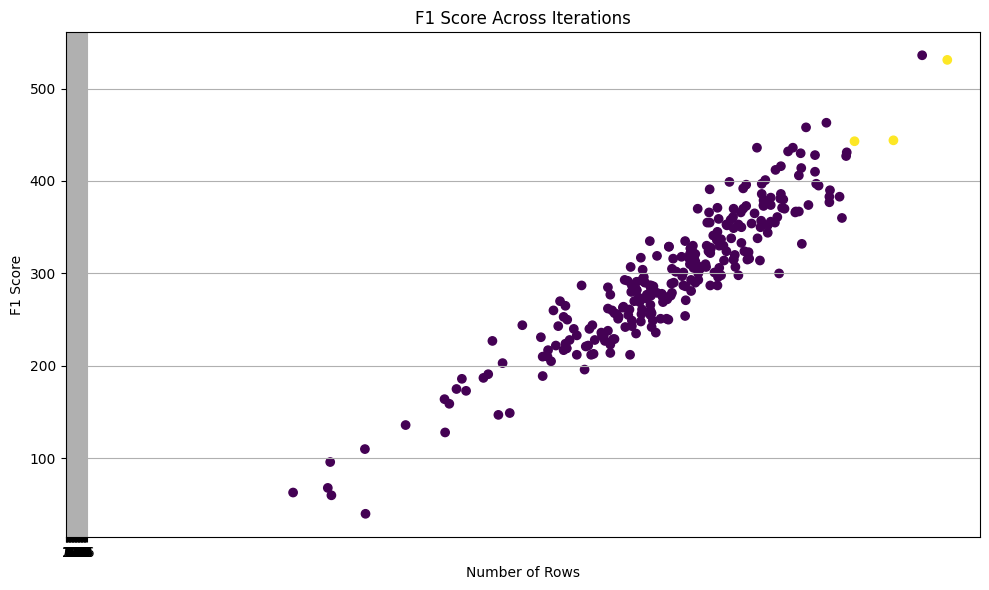

In [112]:
# Plotting the F1 score across iterations
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:274,1], df.iloc[:274,2], c=df.iloc[:274,-1].astype(int))
plt.title('F1 Score Across Iterations')
plt.xlabel('Number of Rows')
plt.ylabel('F1 Score')
plt.xticks(range(1, 37))
plt.grid(True)
plt.tight_layout()
plt.show()

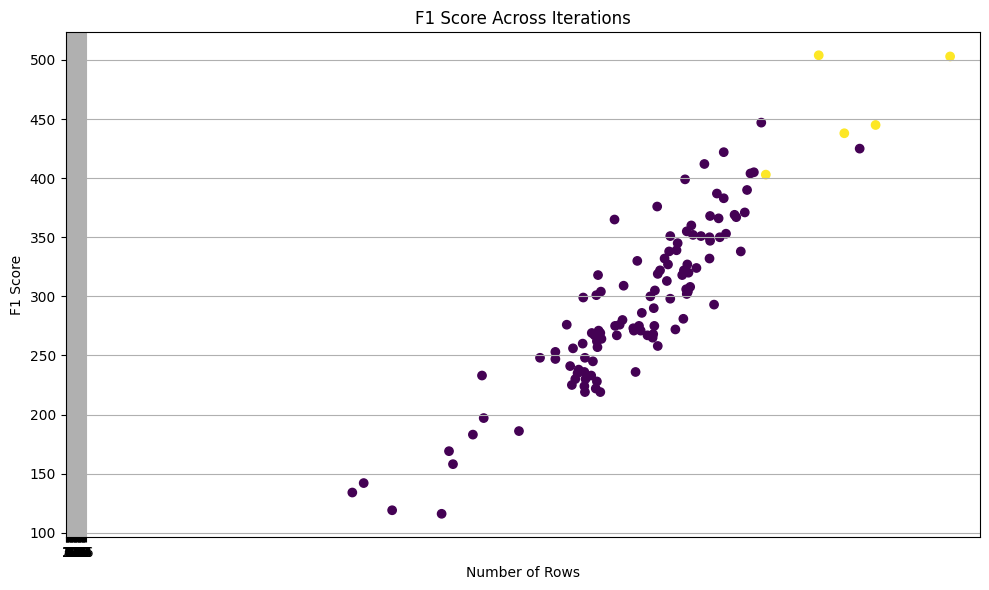

In [114]:
# Plotting the F1 score across iterations
plt.figure(figsize=(10, 6))
plt.scatter(df1.iloc[:,1], df1.iloc[:,2], c=df1.iloc[:,-1].astype(int))
plt.title('F1 Score Across Iterations')
plt.xlabel('Number of Rows')
plt.ylabel('F1 Score')
plt.xticks(range(1, 37))
plt.grid(True)
plt.tight_layout()
plt.show()

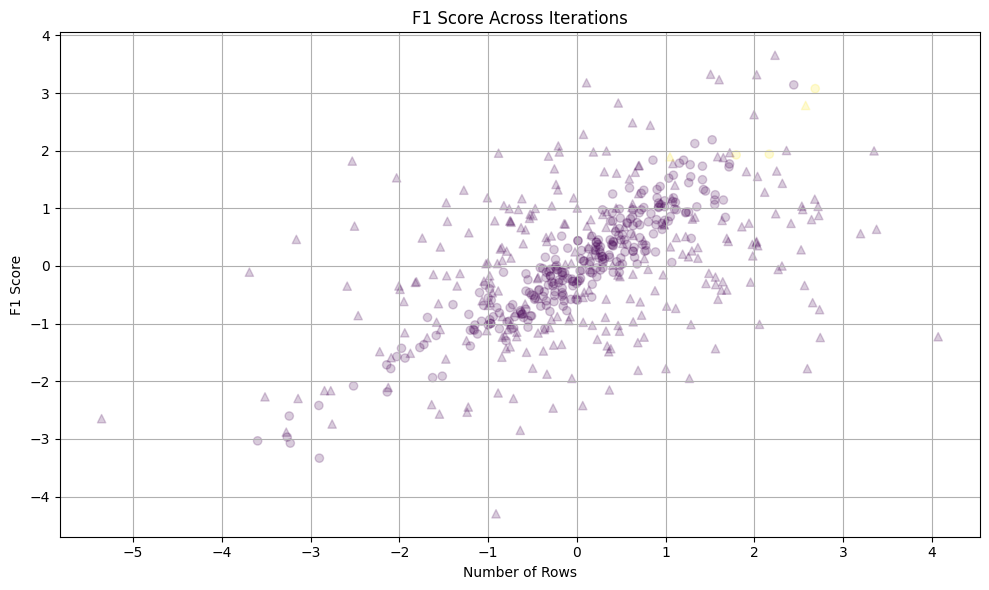

In [208]:
# Plotting the F1 score across iterations
plt.figure(figsize=(10, 6))
plt.scatter(standardized_df.iloc[:274,1], standardized_df.iloc[:274,2], c=df.iloc[:274,-1].astype(int), alpha=0.2)
plt.scatter(new_train.iloc[:,1], new_train.iloc[:,2], c=y_train1.iloc[273:].astype(int), marker='^', alpha=0.2)
plt.title('F1 Score Across Iterations')
plt.xlabel('Number of Rows')
plt.ylabel('F1 Score')
plt.xticks(range(-5, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [178]:
standardized_df = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / df.iloc[:,:-1].std()
testing_df = (df1.iloc[:,:-1] - df1.iloc[:,:-1].mean()) / df1.iloc[:,:-1].std()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.053525,0.449705,0.317439,0.513266,0.129566,0.379754,0.535776,0.622801,0.680432,0.444610,...,0.794009,0.232542,0.375231,0.061953,0.359674,0.607404,0.107750,0.129238,0.491942,0.331530
1,-0.143850,-0.537808,-0.892193,-1.229436,-1.107027,-1.015358,-1.216454,-0.926179,-0.939473,-0.657522,...,-0.942531,-0.940541,-1.237349,-1.128819,-1.006056,-0.885798,-0.739883,-0.774784,1.665312,1.487751
2,0.448275,0.582989,0.344622,0.222953,0.017148,-0.624727,-0.905575,-0.409852,-0.446459,0.662587,...,0.907550,-0.107482,-0.353659,-0.586189,0.522968,0.607404,0.531567,0.462092,-0.485866,-0.694388
3,-0.538599,-0.610509,-0.851419,-0.881707,-0.938401,-0.401509,-0.227292,-0.237744,-0.164736,-0.608539,...,-0.022157,-0.881037,-0.939019,-0.963015,-0.916987,-0.885798,-0.527975,-0.439388,0.589723,0.811633
4,1.040400,1.007075,0.929051,0.582568,0.551132,1.216822,1.016227,1.139127,0.891724,0.691977,...,-0.307952,0.972094,0.727477,0.710094,0.983160,0.607404,2.014925,1.738859,-0.681427,-1.091618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.735974,-0.628684,-0.525226,-0.165695,-0.151478,-0.122486,0.281420,-0.581961,-0.516889,-0.537512,...,0.359584,-0.592017,-0.356685,-0.375166,-0.204432,-0.139197,-0.951792,-0.912776,0.068226,0.460179
114,-0.143850,-0.028906,-0.321355,-0.322943,-0.516835,0.044927,0.196635,-0.065635,-0.023875,-0.189729,...,-0.042839,-0.413504,-0.450265,-0.601262,-0.352881,-0.139197,0.107750,0.191158,0.328974,0.310922
115,0.250900,0.116495,-0.457269,-0.824752,-0.966505,-0.568922,-0.764266,-0.065635,-0.094305,0.442160,...,0.026964,-0.439006,-0.709876,-0.767065,-0.590399,-0.885798,0.531567,0.529237,0.100819,-0.112449
116,0.448275,0.486056,0.385396,0.282964,0.213879,1.216822,1.355368,-1.270397,-1.362057,0.417669,...,-0.213849,0.674573,0.728815,0.755313,0.715952,0.607404,0.319658,0.238277,0.687504,0.263317
